In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io


In [96]:
df = pd.read_csv('../../../frogs_project/data/avraham__ivry_fig1_rotFig1_v2.csv',header=None)
df = df.T

In [98]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5.77,1.65,20.55,2.65,-36.86,2.88,20.83,2.83,7.02,-28.85,...,66.53,47.34,47.94,-0.95,31.46,-44.67,23.53,6.95,14.45,24.14
1,-84.62,10.57,14.13,3.91,-20.82,5.52,11.11,0.43,15.88,2.27,...,-5.38,-4.46,35.99,38.63,-16.27,3.60,11.47,-86.86,90.21,48.71
2,12.22,5.40,13.85,-1.60,39.75,13.52,11.87,4.52,5.78,27.11,...,-9.37,7.36,8.10,49.72,27.56,6.29,35.10,4.74,-65.02,48.14
3,21.90,-1.39,11.00,20.14,46.91,24.24,27.56,30.53,-7.19,34.12,...,-33.98,10.39,-6.53,28.16,-7.92,4.62,51.98,17.80,-15.63,45.36
4,-6.48,71.13,0.64,16.48,45.53,32.99,14.61,37.05,8.80,46.17,...,-6.22,14.73,2.48,5.77,-7.50,29.27,41.72,-8.81,41.11,40.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,39.61,34.02,43.66,35.20,44.27,38.32,39.85,35.52,49.54,39.02,...,45.58,39.33,44.84,42.73,33.54,41.43,41.28,48.02,44.88,46.71
116,51.39,34.00,40.06,33.47,43.14,39.39,43.56,40.81,47.80,41.91,...,46.99,34.41,40.58,53.47,30.84,42.81,43.31,46.62,42.83,47.11
117,36.91,30.53,44.90,34.22,46.41,37.79,44.51,43.15,55.14,42.48,...,39.45,39.30,37.47,42.69,36.22,36.97,39.14,41.22,42.92,42.55
118,44.81,37.56,37.94,36.59,34.35,35.57,40.91,42.49,42.40,48.69,...,39.66,37.94,38.17,46.67,30.87,43.44,46.69,41.07,39.00,42.27


In [99]:
ii = 10
columns_to_plot = df.to_numpy()

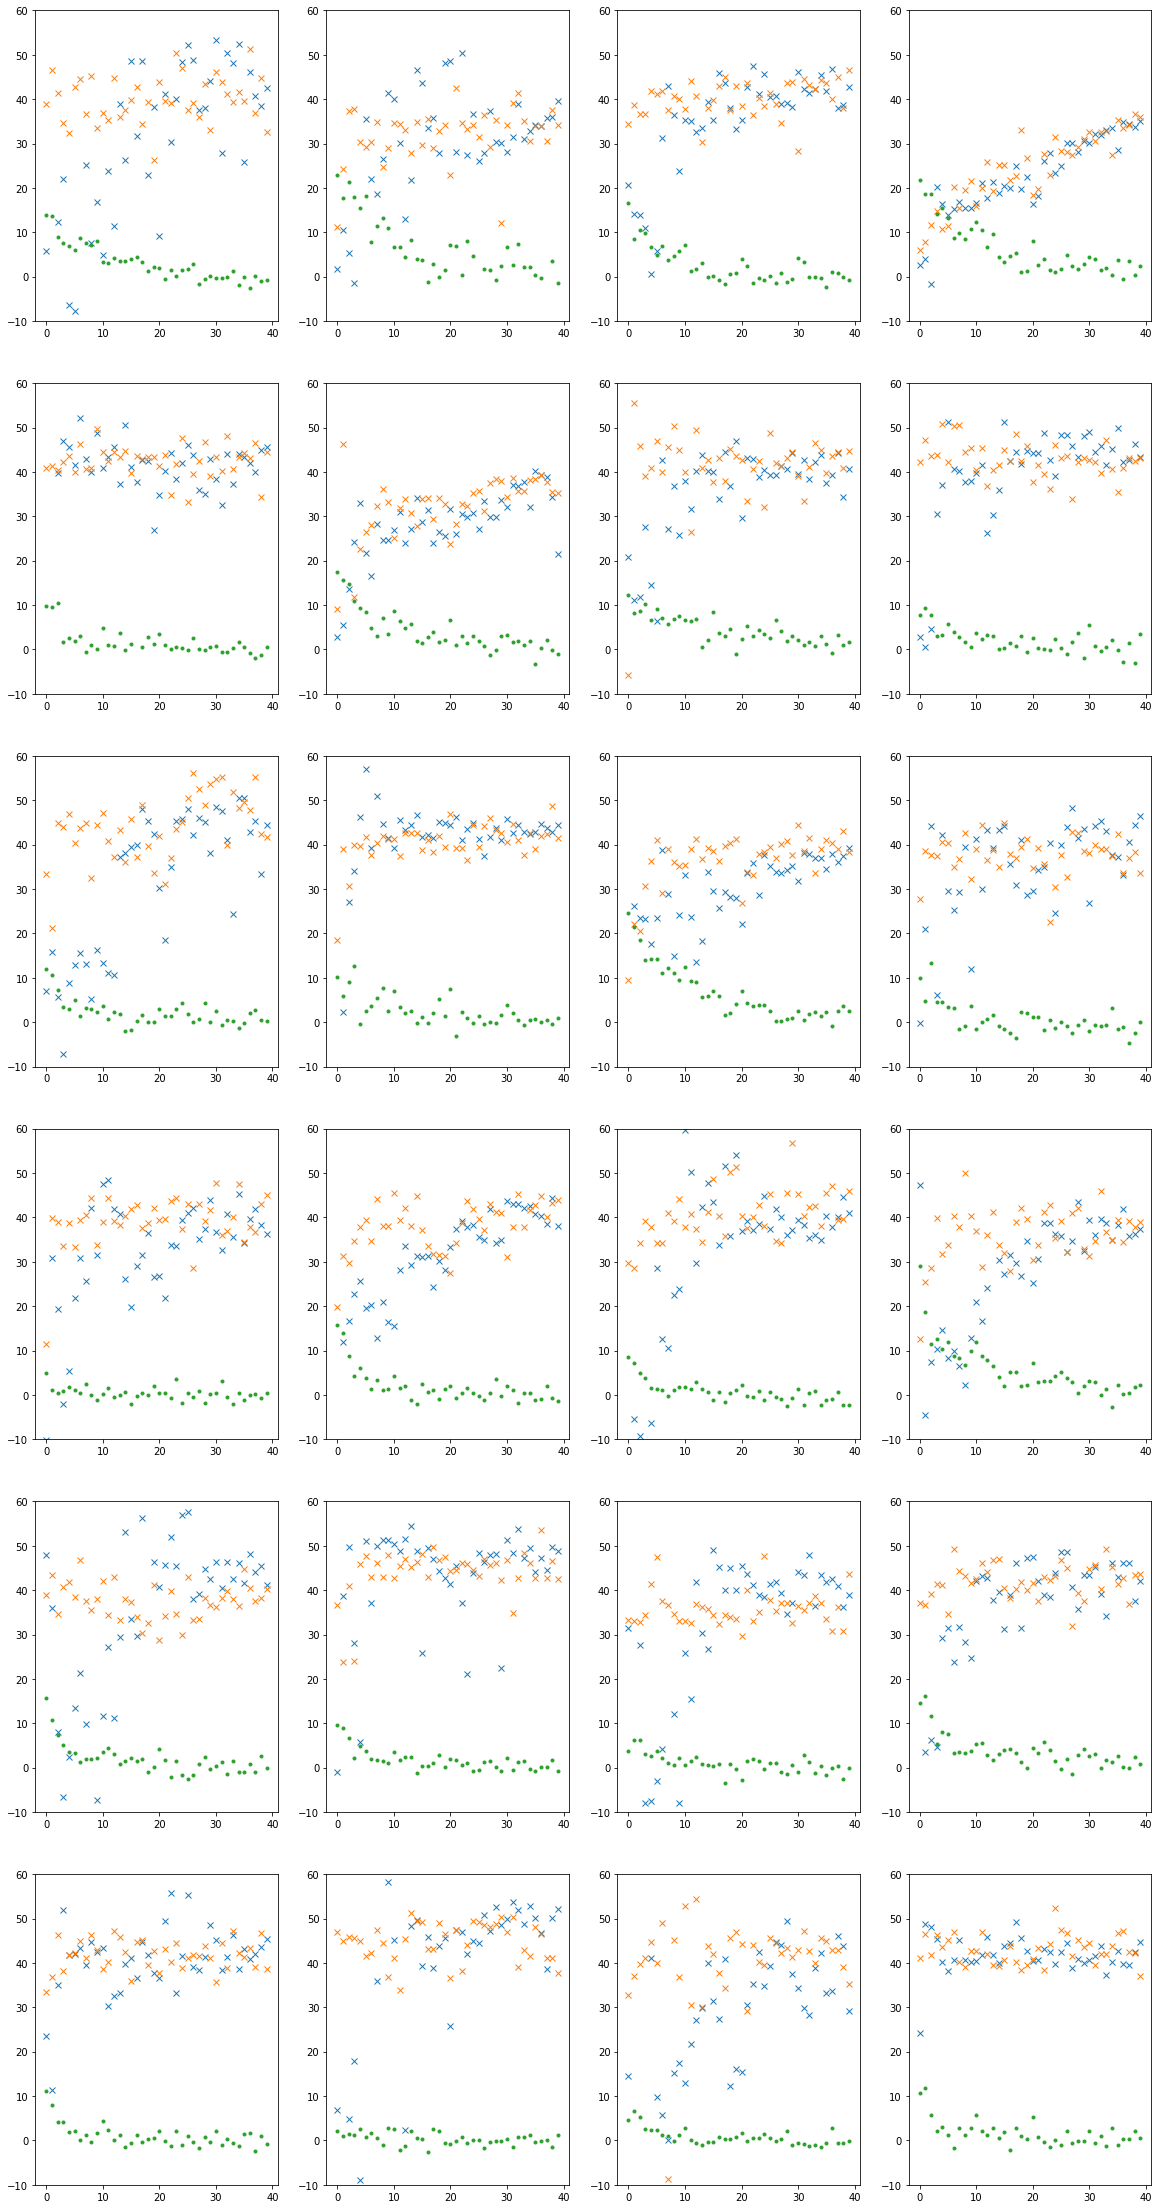

In [101]:
# plt.plot(column_to_plot.to_numpy(),'x-')
plt.figure(figsize=(20,40))
for ii in range(24):
    plt.subplot(6,4,ii+1)
    plt.plot(columns_to_plot[:40,ii],'x')
    plt.plot(columns_to_plot[80:,ii],'x')
    plt.plot(columns_to_plot[40:80,ii],'.')

    plt.ylim([-10,60])

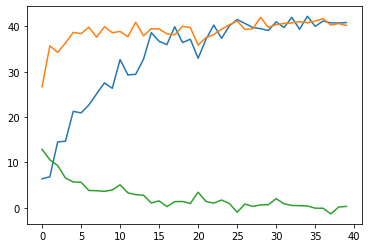

In [102]:
plt.plot(columns_to_plot[:40].mean(axis=-1))
plt.plot(columns_to_plot[80:].mean(axis=-1))
plt.plot(columns_to_plot[40:80].mean(axis=-1))

In [31]:
# mat = scipy.io.loadmat('../../../Downloads/evoked_recovery_participant1.mat')

In [68]:
dfs_e = {}
dfs_s = {}
for i in range(1,9):
    dfs_e[i] = pd.read_csv(f'../../../frogs_project/data/COIN_data/trial_data_evoked_recovery_participant{i}.csv')
    dfs_s[i] = pd.read_csv(f'../../../frogs_project/data/COIN_data/trial_data_spontaneous_recovery_participant{i}.csv')


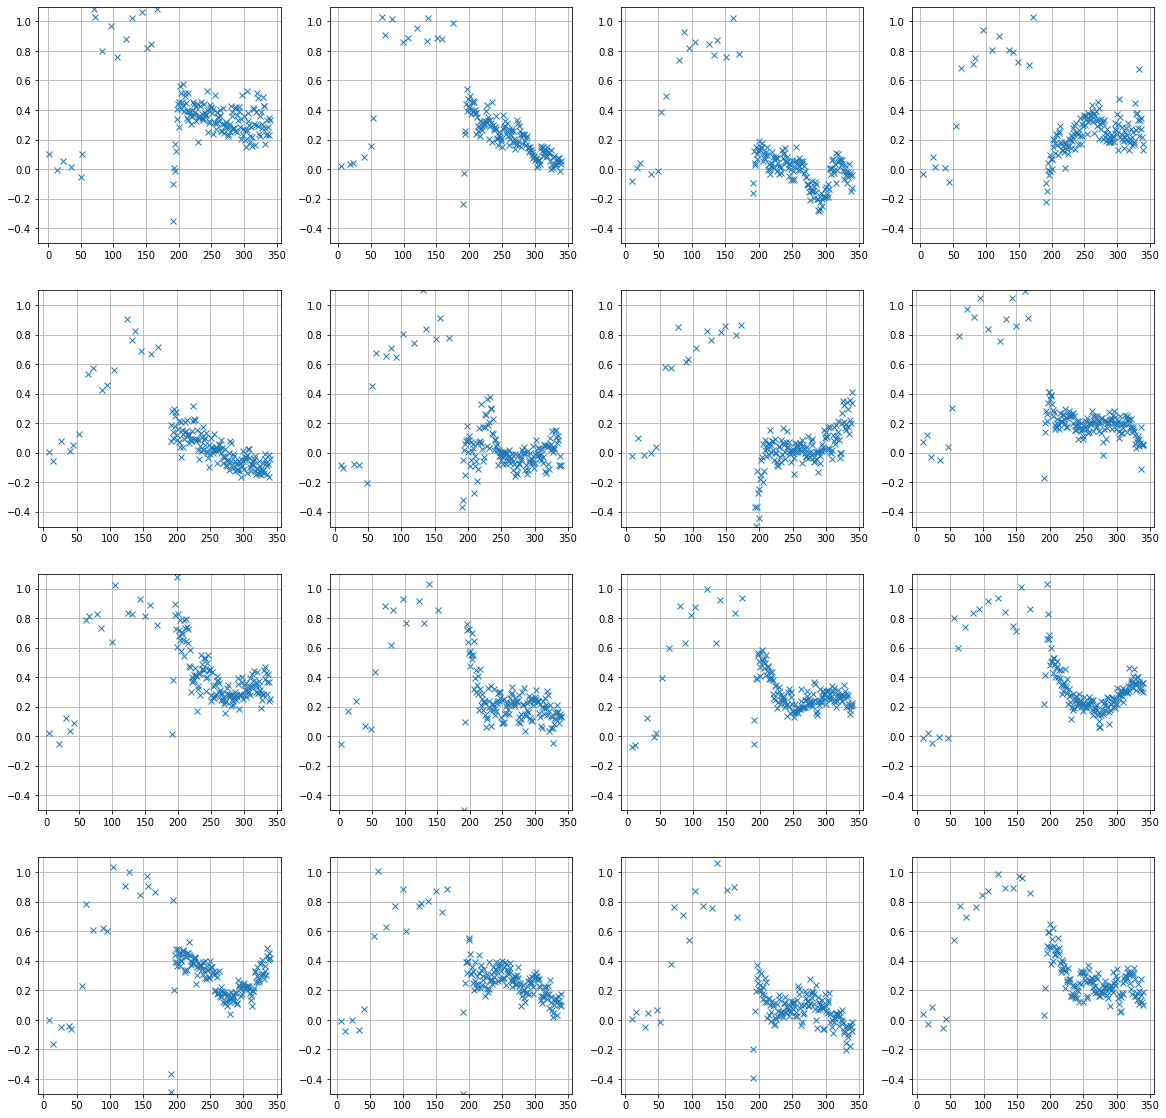

In [66]:
cnt = 1
plt.figure(figsize=(20,20))
for these_dfs in [dfs_s, dfs_e]:
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-0.5,1.1])
        plt.grid()
        cnt += 1

In [88]:
for name in set(dfs_s[2].BlockName):
    print(f'trials in block {name}: {sum(dfs_s[2].BlockName == name)}')

trials in block FieldA: 120
trials in block PostRest: 5
trials in block FieldB: 15
trials in block Clamp150: 150
trials in block Null: 50


In [91]:
for name in set(dfs_e[2].BlockName):
    print(f'trials in block {name}: {sum(dfs_e[2].BlockName == name)}')

trials in block FieldA: 120
trials in block Clamp2: 2
trials in block PostRest: 5
trials in block FieldB: 15
trials in block Clamp150: 146
trials in block FieldA2: 2
trials in block Null: 50


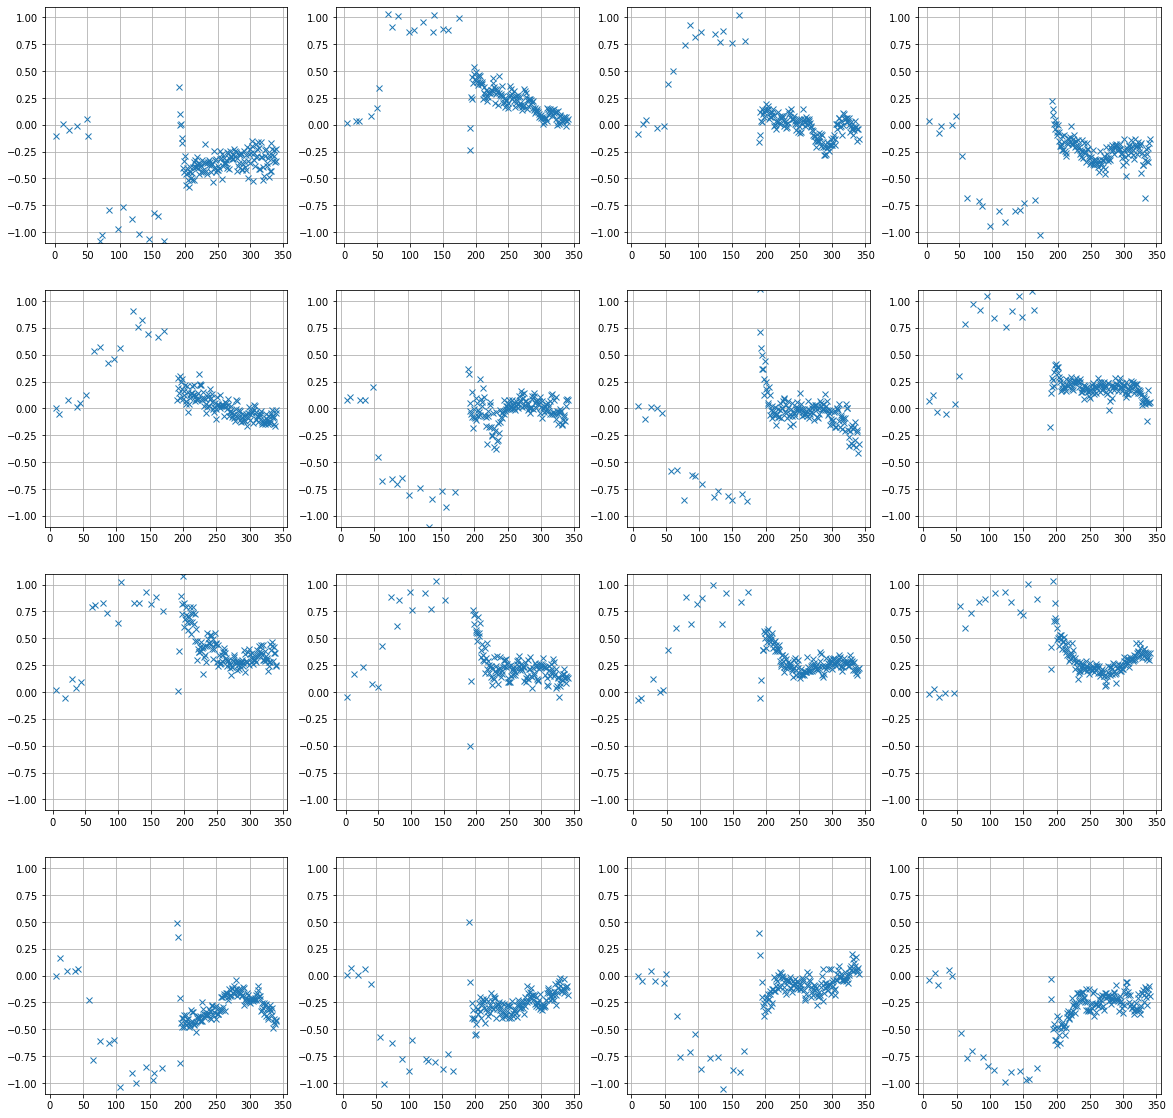

In [69]:
cnt = 1
plt.figure(figsize=(20,20))
for these_dfs in [dfs_s, dfs_e]:
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
#         y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-1.1,1.1])
        plt.grid()
        cnt += 1

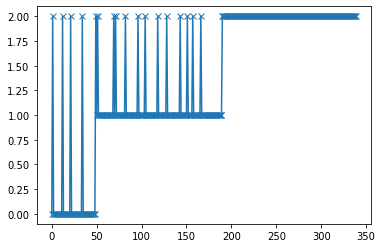

In [78]:
plt.plot(dfs_s[1].FieldType,'x-')

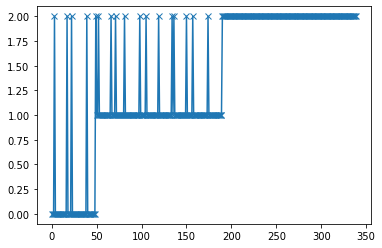

In [80]:
plt.plot(dfs_s[2].FieldType,'x-')

In [83]:
for yy in dfs_s[2].BlockName:print(yy)

Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
PostRest
PostRest
PostRest
PostRest
PostRest
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
Field

In [90]:
for yy in dfs_e[2].BlockName:print(yy)

Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
PostRest
PostRest
PostRest
PostRest
PostRest
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
FieldA
Field